In [4]:
!pip install nltk

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')


### Data Loading & Preprocessing 

In [2]:
# Loading the CSV file.
df = pd.read_csv('AI in Renwable energies.csv')


In [3]:
# Dropping rows with missing values in 'Abstract' and 'Title'
df.dropna(subset=['Abstract', 'Title', 'Year'], inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Title,Year,Link,Affiliations,Abstract
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t..."


In [4]:
# Combining Title and Abstract for a richer text corpus
df['Combined_Text'] = df['Title'] + ". " + df['Abstract']
df.head(5)


,Title,Year,Link,Affiliations,Abstract,Combined_Text
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...,Smart Cropping based on Predicted Solar Radiat...
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...,Systematic literature review of photovoltaic o...
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...,Demystifying the use of era5-land and machine ...
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...,A CNN-Based Warning Information Preprocessing ...
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t...",Short-Term Photovoltaic Power Prediction Model...


#### Lemmatization

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aniruddha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aniruddha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
# Defining a custom list of stopwords to remove common, non-informative words
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['using', 'based', 'approach', 'model', 'data', 'study', 'research', 'like', 'result', 'paper', 'work', 'new'])

In [11]:
from nltk.stem import WordNetLemmatizer

# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Removing non-alphabetic characters
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in custom_stopwords and len(word) > 2]
    return ' '.join(tokens)

df['Processed_Text'] = df['Combined_Text'].apply(preprocess_text)

# Inspecting Processed_Text Rows
df[['Title', 'Processed_Text']].head()

,Title,Processed_Text
0,Smart Cropping based on Predicted Solar Radiat...,smart cropping predicted solar radiation iot m...
1,Systematic literature review of photovoltaic o...,systematic literature review photovoltaic outp...
2,Demystifying the use of era5-land and machine ...,demystifying use eraland machine learning wind...
3,A CNN-Based Warning Information Preprocessing ...,cnnbased warning information preprocessing met...
4,Short-Term Photovoltaic Power Prediction Model...,shortterm photovoltaic power prediction modeli...


### Topic Modeling
- Now that our text data is pre-processed, we can move on to the core of the analysis : **Topic Modeling**.
- We'll use the **LDA Algorithm** from scikit-learn to identify the underlying themes in the abstracts and titles.
- This process will transform the processed text into a format suitable for the LDA model and then train the model to find a specified number of topics.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Using CountVectorizer to create a document-term matrix
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5)
tf = tf_vectorizer.fit_transform(df['Processed_Text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Running LDA Algorithm
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)


LatentDirichletAllocation(random_state=0)

- 'max_df' removes words that appear in more than 90% of documents.
- 'min_df' removes words that appear in less than 5 documents.

In [12]:
# Function to print top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics_list.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    return topics_list

# Displaying the topics
no_top_words = 10
topics_found = display_topics(lda, tf_feature_names, no_top_words)
print("Identified Topics:")
for topic_str in topics_found:
    print(topic_str)

Identified Topics:
Topic 1: smart, system, grid, power, learning, renewable, fault, network, management, machine
Topic 2: emission, development, consumption, analysis, renewable, gas, carbon, environmental, country, factor
Topic 3: system, renewable, building, electricity, technology, source, decision, market, analysis, use
Topic 4: solar, network, neural, ann, artificial, radiation, used, temperature, prediction, model
Topic 5: production, waste, biogas, hydrogen, methane, anaerobic, yield, digestion, process, biomass
Topic 6: wind, power, forecasting, prediction, network, neural, method, speed, model, forecast
Topic 7: system, power, load, renewable, proposed, optimization, method, network, algorithm, grid
Topic 8: wind, turbine, solar, system, water, panel, condition, power, photovoltaic, method
Topic 9: biomass, hydrogen, fuel, process, cell, catalyst, production, water, high, rate
Topic 10: power, system, control, controller, neural, renewable, proposed, voltage, network, source


### Data Visualization - EDA Analysis

**Objectives:**
- Determining the most dominant topic for each research paper.
- Grouping the papers by year and dominant topic.
- Plotting the results as a line chart to show the trends visually.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to get topic weights per document
def get_topic_weights(model, tf_matrix):
    doc_topic_dist = model.transform(tf_matrix)
    return doc_topic_dist

# Geting topic weights for each document
doc_topic_weights = get_topic_weights(lda, tf)
dominant_topic = np.argmax(doc_topic_weights, axis=1)
df['dominant_topic'] = dominant_topic
df.head()

,Title,Year,Link,Affiliations,Abstract,Combined_Text,Processed_Text,dominant_topic
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...,Smart Cropping based on Predicted Solar Radiat...,smart cropping predicted solar radiation iot m...,2
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...,Systematic literature review of photovoltaic o...,systematic literature review photovoltaic outp...,5
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...,Demystifying the use of era5-land and machine ...,demystifying use eraland machine learning wind...,5
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...,A CNN-Based Warning Information Preprocessing ...,cnnbased warning information preprocessing met...,0
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t...",Short-Term Photovoltaic Power Prediction Model...,shortterm photovoltaic power prediction modeli...,5


**Distribution of Articles by Dominant Topic**
- We already defined topic weights for each document --> dominant_topic column.
- The height of each bar indicates the total number of articles for a given topic. The topics with the tallest bars represent the most frequent areas of AI research in the dataset. By looking at the top words for those topics, you can infer which AI models or applications are most common.

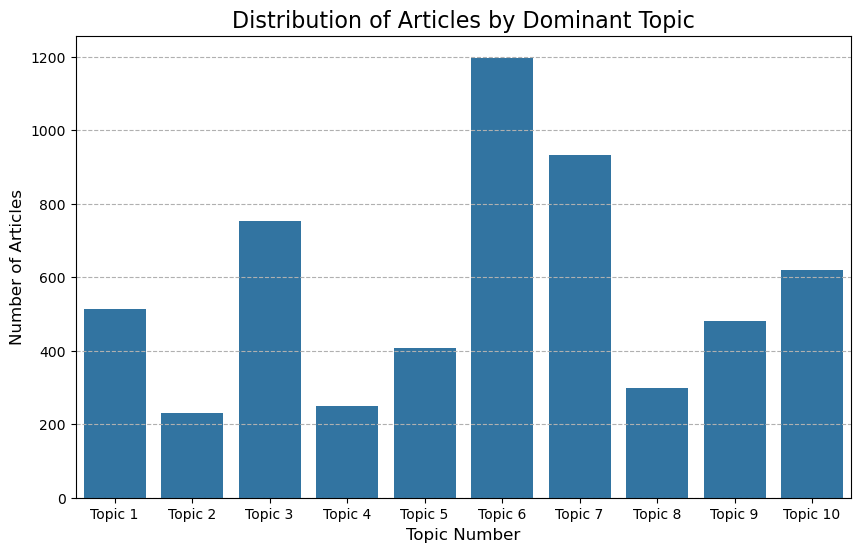

In [14]:
# Counting the number of articles per dominant topic
topic_counts = df['dominant_topic'].value_counts().sort_index()

# Plot the topic distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Distribution of Articles by Dominant Topic', fontsize=16)
plt.xlabel('Topic Number', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(ticks=range(num_topics), labels=[f'Topic {i+1}' for i in range(num_topics)])
plt.grid(axis='y', linestyle='--')
plt.show();


**Topic Trends Over Time**
- Each line represents a different AI trend or application (a topic), and the plot shows how the number of publications for each trend has evolved over the years. You can see which trends are growing, declining, or remaining stable.

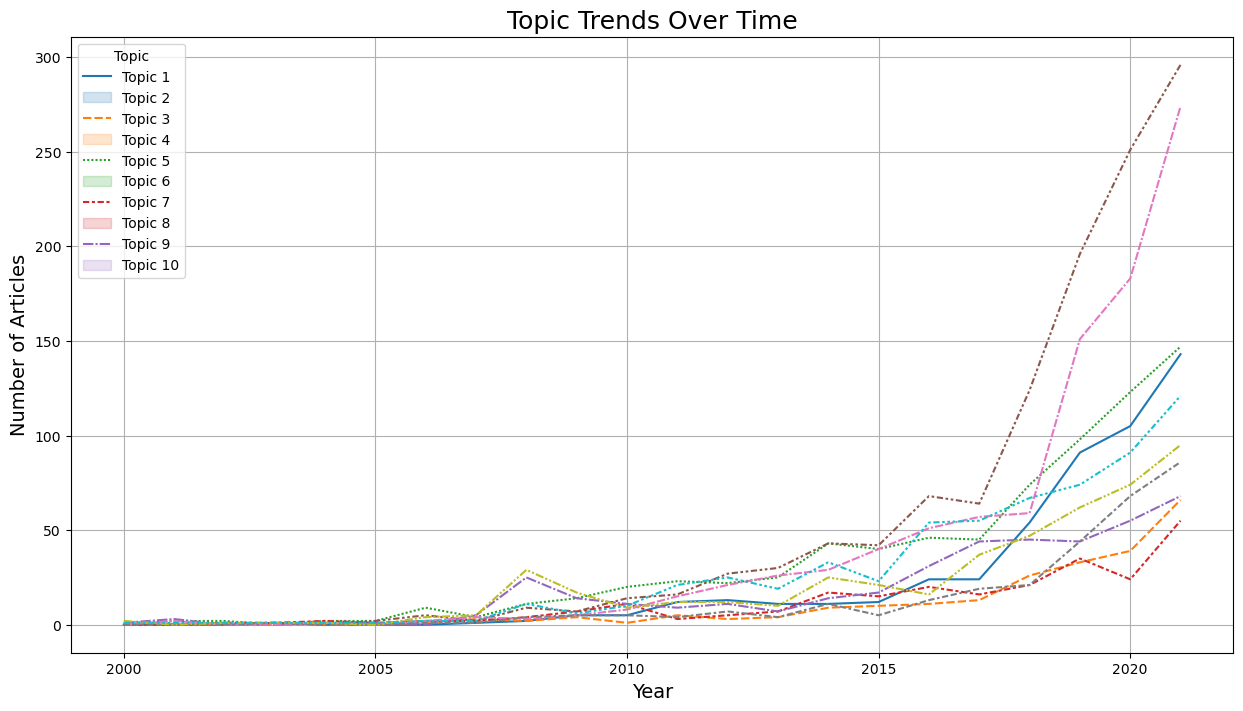

In [15]:
# Grouping by year and dominant topic to see trends
topic_trend = df.groupby(['Year', 'dominant_topic']).size().unstack(fill_value=0)
topic_trend.index = topic_trend.index.astype(int)

# Plotting the topic trends over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=topic_trend)
plt.title('Topic Trends Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(title='Topic', labels=[f'Topic {i+1}' for i in range(num_topics)])
plt.grid(True)
plt.show();


In [16]:
#Saving the plot:
plt.savefig("Topic_Trends_Over_Time.png")

<Figure size 640x480 with 0 Axes>

### Results
**Merging Metayopics and Labeling Metatopics**

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Mapping LDA Topics to Metatopics 
# We'll be using more descriptive names for the metatopics.

# Define the mapping from LDA topic index to metatopic label
topic_to_metatopic = {
    0: 'AI Models and Optimization',     
    1: 'RE Forecasting and Prediction',   
    2: 'AI Models and Optimization',      
    3: 'RE Forecasting and Prediction',    
    4: 'Smart Grid & Energy Management',   
    5: 'Solar and Hybrid Systems',         
    6: 'Solar and Hybrid Systems',         
    7: 'Smart Grid & Energy Management',  
    8: 'AI Models and Optimization',      
    9: 'Smart Grid & Energy Management',   
}


In [18]:
# Getting the dominant topic for each document
doc_topic_weights = lda.transform(tf)
dominant_lda_topic = np.argmax(doc_topic_weights, axis=1)

# Adding the dominant LDA topic to the DataFrame
df['dominant_lda_topic'] = dominant_lda_topic

# Mapping the dominant LDA topics to the new metatopics
df['metatopic'] = df['dominant_lda_topic'].map(topic_to_metatopic)


C:\Users\Aniruddha\AppData\Local\Temp\ipykernel_23068\1230680534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metatopic_counts.index, y=metatopic_counts.values, palette='viridis')


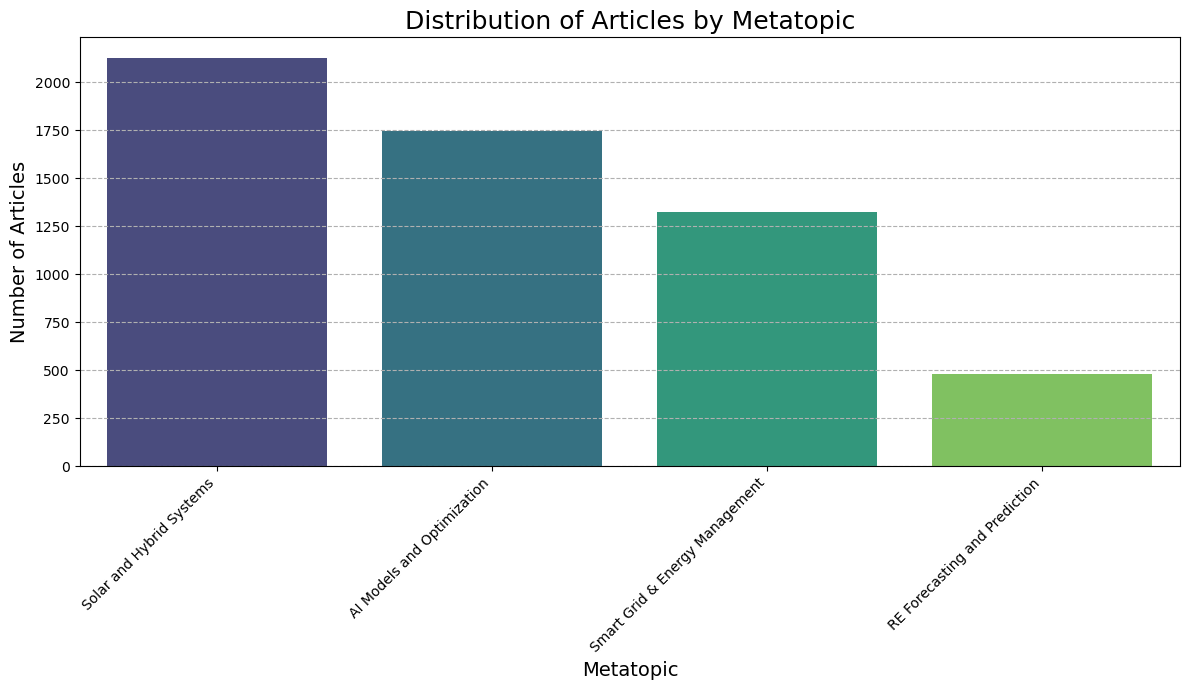

In [19]:
# Step 2: Visualization of Metatopic Distribution 
metatopic_counts = df['metatopic'].value_counts()
plt.figure(figsize=(12, 7))
sns.barplot(x=metatopic_counts.index, y=metatopic_counts.values, palette='viridis')
plt.title('Distribution of Articles by Metatopic', fontsize=18)
plt.xlabel('Metatopic', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show();


In [ ]:
# Step 3: Visualization of Metatopic Trends Over Time 
metatopic_trend = df.groupby(['Year', 'metatopic']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 8))
sns.lineplot(data=metatopic_trend, marker='o')
plt.title('Metatopic Trends Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(title='Metatopic', loc='upper left')
plt.grid(True)
plt.show();